In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

You should start by picking a topic area of interest to you and finding a dataset that can provide insights into that topic. We have provided some datasets below that you can start from. But we encourage you to investigate a different topic and dataset. If you self-select a dataset and are concerned about its appropriateness for the assignment, you can check with the TAs regarding the same.

**Note:** The data collection and preparation (also known as data wrangling) can be a very tedious and time-consuming process. Be sure you have sufficient time to conduct exploratory analysis, after preparing the data.

After selecting a topic and dataset – but prior to analysis – you should write down an initial set of at least three questions you’d like to investigate.

In [ ]:
#link to Medium post of my EDA project
#https://waylandt-91186.medium.com/all-the-hype-bitcoin-a1645b366375

In [ ]:
#Questions:
#1. How do tweets affect the price of Bitcoin? 
#2. How much does a full year of prices differ from another?
#3. Is there a trend in the price of Bitcoin? Are we able to predict it?

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.stats import spearmanr
import seaborn as sn

#load initial data
initial_data = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
#initial_data.head()
#initial_data.tail()

#load cleaned data (after dropping NA values) into new dataframe
#check first and last five rows
new_data = initial_data.dropna()
new_data.reset_index(inplace = True, drop = True)
new_data.head()
new_data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3484300,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
3484301,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
3484302,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
3484303,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
3484304,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [69]:
#change timestamp to readable format
new_data['Timestamp'] = pd.to_datetime(new_data['Timestamp'], unit='s')
new_data.head()
new_data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3484300,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
3484301,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
3484302,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
3484303,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
3484304,2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


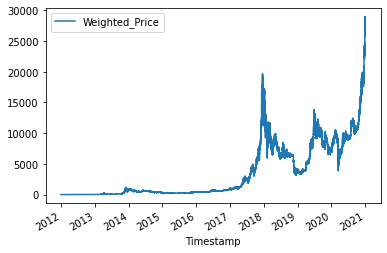

In [70]:
#plot for a visual of Bitcoin prices from 2011-2020 
#(there are only 4 data points from 2011 but because of how big the entire dataset is and the point of focus not being 2011, it does not skew the results nor the interpretation)
new_data.plot(x="Timestamp",y="Weighted_Price")

In [71]:
#add a column called "Year"
new_data["year"] = pd.DatetimeIndex(new_data["Timestamp"]).year
new_data.head()

#make a dataframe that only contains year 2020
df2020 =  new_data[new_data["year"] == 2020]
df2020.reset_index(inplace=True, drop=True)

#add new column "Month"
df2020["month"] = pd.DatetimeIndex(df2020["Timestamp"]).month

#add new column "Day"
df2020["day"] = pd.DatetimeIndex(df2020["Timestamp"]).day

df2020.head()
df2020.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,year,month,day
517451,2020-12-30 23:56:00,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020,12,30
517452,2020-12-30 23:57:00,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020,12,30
517453,2020-12-30 23:58:00,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020,12,30
517454,2020-12-30 23:59:00,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020,12,30
517455,2020-12-31 00:00:00,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061,2020,12,31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



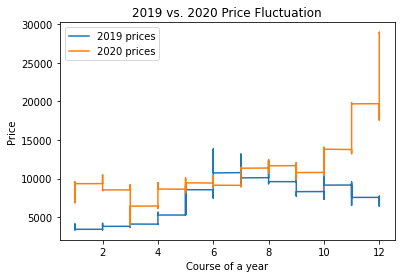

In [72]:
#make dataframe with only the year 2019
df2019 = new_data[new_data["year"] == 2019]
#add new column "Month"
df2019["month"] = pd.DatetimeIndex(df2019["Timestamp"]).month

#add new column "Day"
df2019["day"] = pd.DatetimeIndex(df2019["Timestamp"]).day
df2019.reset_index(inplace=True, drop=True)

#df2019.head()
#df2019.tail()

#show how prices fluctuate totally differently from year to year by showing 2019 and 2020 prices plotted together
plt.plot(df2019.month, df2019.Weighted_Price, label = '2019 prices')
plt.plot(df2020.month, df2020.Weighted_Price, label = '2020 prices')
plt.xlabel('Course of a year')
plt.ylabel('Price')
plt.title("2019 vs. 2020 Price Fluctuation")
plt.legend()

In [73]:
#no missing values
#can tell far the min and max prices are from the average price
#also crazy to note that the new ATH (All Time High) as of 03/05/2021 is over $50000, almost double the max value shown in the table below
print(df2020.describe())

                Open           High  ...          month            day
count  517456.000000  517456.000000  ...  517456.000000  517456.000000
mean    11052.215476   11058.263578  ...       6.499728      15.710045
std      4169.439557    4172.212803  ...       3.457796       8.796471
min      3858.270000    3927.050000  ...       1.000000       1.000000
25%      8858.465000    8864.425000  ...       3.000000       8.000000
50%      9701.220000    9706.315000  ...       7.000000      16.000000
75%     11638.905000   11644.165000  ...      10.000000      23.000000
max     28997.380000   29010.320000  ...      12.000000      31.000000

[8 rows x 10 columns]


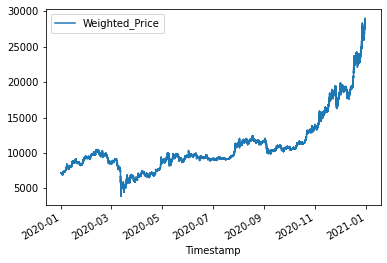

In [74]:
#plot data from 2020
plt_2020 = df2020.plot(x="Timestamp",y="Weighted_Price")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning:

Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.



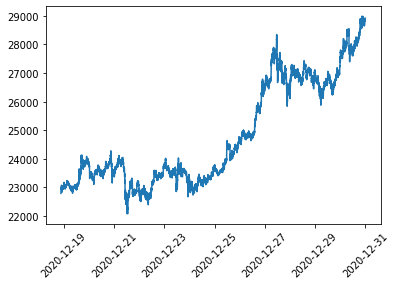

In [75]:
#elon musk tweets "Bitcoin is my safeword" and "Bitcoin is almost as bs as fiat money" on Dec.20 2020 (both were negative tweets towards BTC)
#data around musk's tweets
df2020_musk = df2020_final[500000:]
#df2020_musk.head()
plt.xticks(rotation=45)
plt.plot('ds', 'y', data=df2020_musk)
#as you can see though, there wasn't a huge drop in prices (in BTC terms that is) after his tweets 

In [76]:
#prophet library
import fbprophet

In [77]:
#make new copy of dataset of only ds and y columns (column names that apply to fbprophet)
df2020_updated = df2020.drop(columns=['Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','year','month','day'])
df2020_final = df2020_updated.rename(columns={"Timestamp" : "ds", "Weighted_Price" :"y"})
df2020_final

,ds,y
0,2020-01-01 00:00:00,7160.068520
1,2020-01-01 00:01:00,7161.198209
2,2020-01-01 00:02:00,7158.820000
3,2020-01-01 00:03:00,7158.321885
4,2020-01-01 00:04:00,7155.235666
...,...,...
517451,2020-12-30 23:56:00,28806.429798
517452,2020-12-30 23:57:00,28846.441863
517453,2020-12-30 23:58:00,28879.056266
517454,2020-12-30 23:59:00,28893.695831


In [78]:
#only take two months of data
df2020_novdec = df2020_final[431230:]
df2020_novdec

,ds,y
431230,2020-11-01 00:00:00,13765.082827
431231,2020-11-01 00:01:00,13743.726038
431232,2020-11-01 00:02:00,13754.056385
431233,2020-11-01 00:03:00,13772.215662
431234,2020-11-01 00:04:00,13809.364504
...,...,...
517451,2020-12-30 23:56:00,28806.429798
517452,2020-12-30 23:57:00,28846.441863
517453,2020-12-30 23:58:00,28879.056266
517454,2020-12-30 23:59:00,28893.695831


In [79]:
#fit prophet model on the btc price dataset
from fbprophet import Prophet

#define model
model = Prophet()

#fit the model
model.fit(df2020_novdec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [80]:
#out-of-sample forecast

#define the period for which we want a prediction
#because I only wanted to predict the short term trend and only used data of the previous two months, I chose to predict the prices in Jan and Feb 2021
future = list()
for i in range(1, 4):
	date = '2021-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future

,ds
0,2021-01-01
1,2021-02-01
2,2021-03-01


In [81]:
#summarize the forecast
#because I based prediction on only nov and dec data, the entire trend is upwards
forecast = model.predict(future)

forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-01,28134.475087,27038.432860,28414.485216,27902.082242,28404.628188,-388.754344,-388.754344,-388.754344,34.553631,34.553631,34.553631,-423.307975,-423.307975,-423.307975,0.0,0.0,0.0,27745.720743
1,2021-02-01,42699.222897,-77053.437142,149032.631543,-77059.267424,148549.022838,671.823708,671.823708,671.823708,34.553631,34.553631,34.553631,637.270077,637.270077,637.270077,0.0,0.0,0.0,43371.046605
2,2021-03-01,55854.478984,-258857.922034,333992.271646,-259501.182132,333047.347639,671.823708,671.823708,671.823708,34.553631,34.553631,34.553631,637.270077,637.270077,637.270077,0.0,0.0,0.0,56526.302691


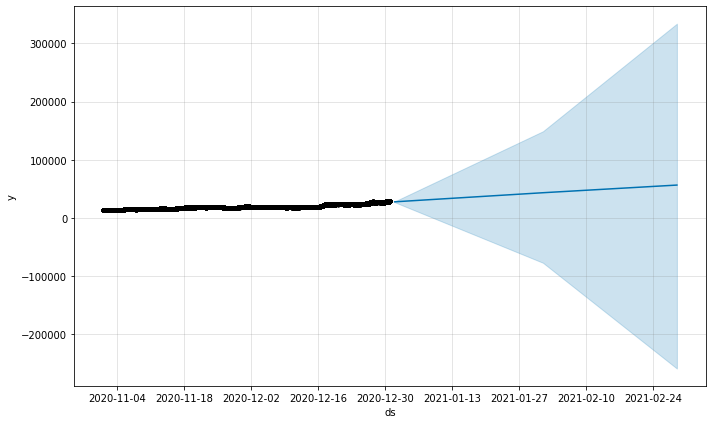

In [82]:
#plot forecast
model.plot(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
plt.show()


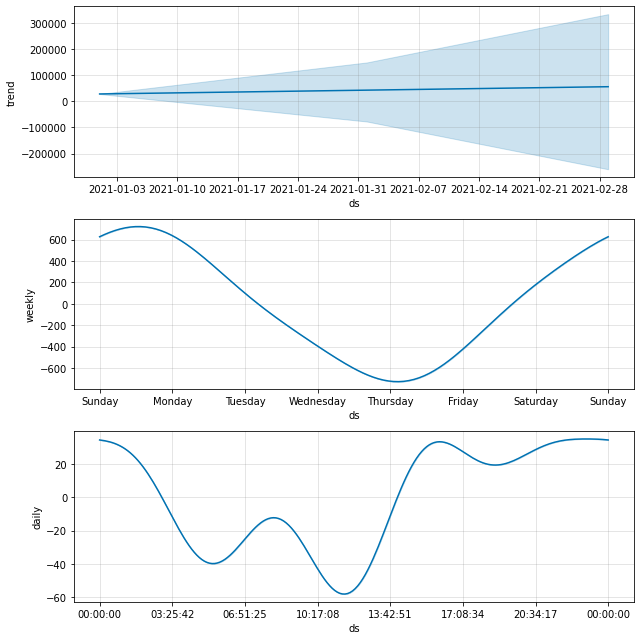

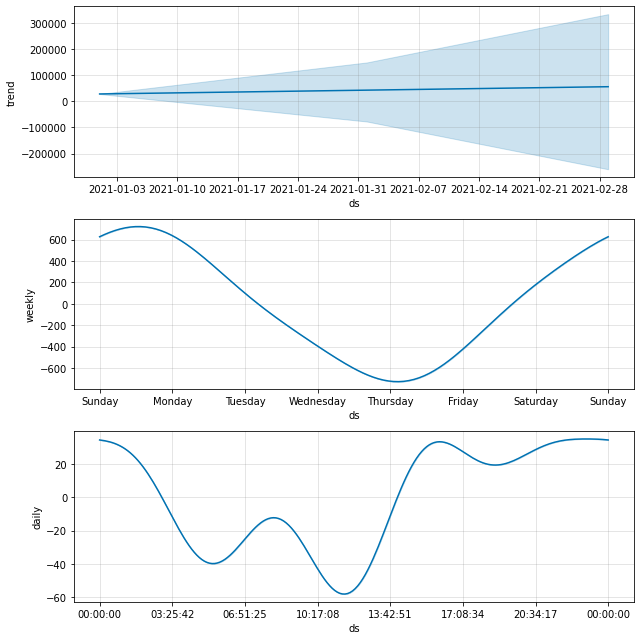

In [83]:
#insight into how the daily, weekly and overall trend patterns contribute to the forecasted prices
#It was interesting to see how the daily and weekly data fluctuated, since crypto trading, unlike the stock market, is up 24/7 all year round
model.plot_components(forecast)

## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

## **Final Deliverable**

Your final submission should take the form of a blog post that consists of 10 or more captioned visualizations detailing your most important insights. You will also work on posting the blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (03/05/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.